<a href="https://colab.research.google.com/github/thwjdstar/weather/blob/main/weather_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B82.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.express as px
import platform
from matplotlib import font_manager, rc

In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 10 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (9,651 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 120880 files and dire

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/데이터분석/data/statisticsDivision_20231123151658.csv', encoding='cp949')

In [7]:
df

,일시,평균기온(℃),최고기온 평균(℃),최저기온 평균(℃),강수량(mm)
0,2013-01,-3.4,0.3,-6.6,22.1
1,2013-02,-1.2,2.8,-4.9,74.1
2,2013-03,5.1,10.8,0.7,27.3
3,2013-04,10.0,15.0,5.7,71.7
4,2013-05,18.2,23.6,13.7,132.0
...,...,...,...,...,...
127,2023-08,27.2,30.8,24.3,298.1
128,2023-09,23.7,27.6,20.2,134.5
129,2023-10,15.8,21.0,11.5,31.0
130,2023-11,NaN,NaN,NaN,69.8


In [14]:
df['일시'].nunique()

132

In [15]:
df['강수량(mm)'].mean()

103.1969696969697

In [16]:
df.isna().sum()

일시            0
평균기온(℃)       1
최고기온 평균(℃)    1
최저기온 평균(℃)    1
강수량(mm)       0
dtype: int64

In [17]:
df['최고기온 평균(℃)'].max()

33.3

In [18]:
df['최저기온 평균(℃)'].max()

25.2

In [19]:
df['최저기온 평균(℃)'] == df['최저기온 평균(℃)'].max()

0      False
1      False
2      False
3      False
4      False
       ...  
127    False
128    False
129    False
130    False
131    False
Name: 최저기온 평균(℃), Length: 132, dtype: bool

In [20]:
df.groupby('일시')['강수량(mm)'].agg([np.sum, np.min])

,sum,amin
일시,,
2013-01,22.1,22.1
2013-02,74.1,74.1
2013-03,27.3,27.3
2013-04,71.7,71.7
2013-05,132.0,132.0
...,...,...
2023-08,298.1,298.1
2023-09,134.5,134.5
2023-10,31.0,31.0


In [21]:
df2 = df[df['일시'].str.contains('2013')]

In [22]:
df[df['일시'].str.contains('2014')]

,일시,평균기온(℃),최고기온 평균(℃),최저기온 평균(℃),강수량(mm)
12,2014-01,-0.7,3.5,-4.9,13.0
13,2014-02,1.9,6.6,-1.8,16.2
14,2014-03,7.9,13.1,3.5,7.2
15,2014-04,14.0,19.6,9.4,31.0
16,2014-05,18.9,25.3,13.8,63.0
17,2014-06,23.1,27.8,19.7,98.1
18,2014-07,26.1,30.6,22.9,207.9
19,2014-08,25.2,29.0,22.1,172.8
20,2014-09,22.1,27.0,18.0,88.1
21,2014-10,15.6,21.4,10.7,52.2


In [61]:
df[df['일시'].str.contains('2013')]

,일시,평균기온(℃),최고기온 평균(℃),최저기온 평균(℃),강수량(mm)
0,2013-01,-3.4,0.3,-6.6,22.1
1,2013-02,-1.2,2.8,-4.9,74.1
2,2013-03,5.1,10.8,0.7,27.3
3,2013-04,10.0,15.0,5.7,71.7
4,2013-05,18.2,23.6,13.7,132.0
5,2013-06,24.4,29.2,20.5,28.3
6,2013-07,25.5,28.3,23.4,676.2
7,2013-08,27.7,31.1,24.8,148.6
8,2013-09,21.8,25.9,18.0,138.5
9,2013-10,15.8,21.2,10.9,13.5


In [24]:
df.columns

Index(['일시', '평균기온(℃)', '최고기온 평균(℃)', '최저기온 평균(℃)', '강수량(mm)'], dtype='object')

In [25]:
df[df['일시'].str.contains('2013')] == df[['최고기온 평균(℃)']].min()
plt.show()

<ipython-input-25-f86202a85a07>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df[df['일시'].str.contains('2013')] == df[['최고기온 평균(℃)']].min()


In [26]:
type(df['일시'])

pandas.core.series.Series

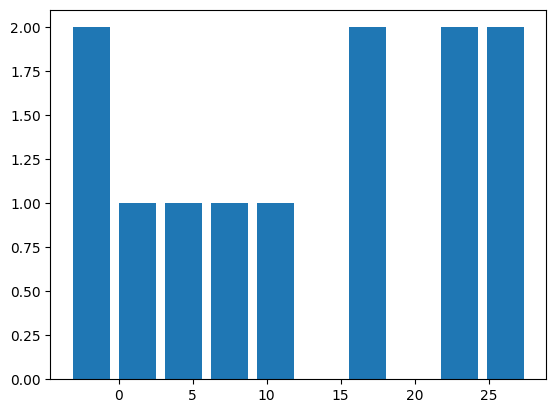

In [27]:
plt.hist(data=df[df['일시'].str.contains('2013')],x='평균기온(℃)', rwidth=0.8)
plt.show()

In [28]:
df['일시'] >= '2013-01'

df['일시'] <= '2013-12'

0      True
1      True
2      True
3      True
4      True
       ... 
127    True
128    True
129    True
130    True
131    True
Name: 일시, Length: 132, dtype: bool

In [29]:
df = df.fillna(0)

In [30]:
df.describe()

,평균기온(℃),최고기온 평균(℃),최저기온 평균(℃),강수량(mm)
count,132.000000,132.000000,132.000000,132.000000
mean,13.372727,18.181061,9.312121,103.196970
std,10.122638,10.112136,10.278073,126.942402
min,-4.000000,0.000000,-7.300000,0.000000
25%,4.500000,9.850000,0.525000,23.525000
50%,14.250000,19.850000,9.550000,62.700000
75%,22.875000,27.625000,18.900000,132.625000
max,28.800000,33.300000,25.200000,676.200000


In [31]:
df[df['일시'] == '2013']

,일시,평균기온(℃),최고기온 평균(℃),최저기온 평균(℃),강수량(mm)


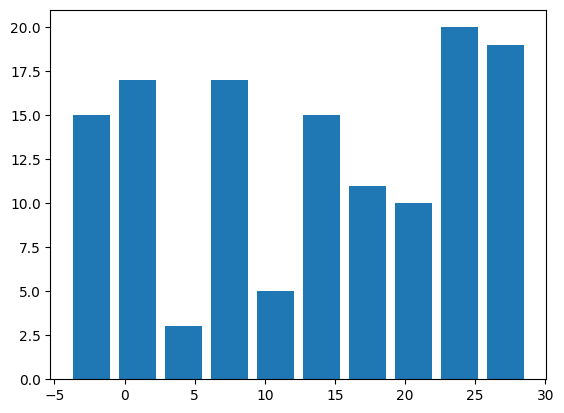

In [32]:
plt.hist(data=df,x='평균기온(℃)', rwidth=0.8)
plt.show()

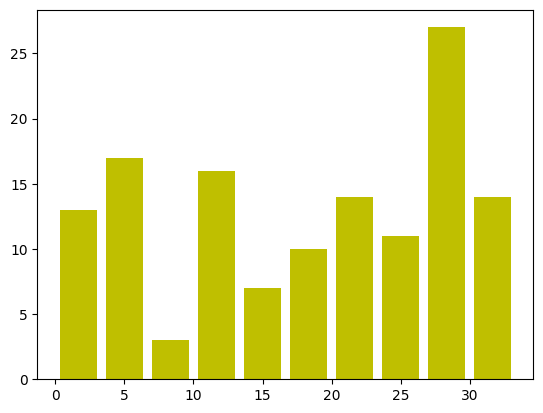

In [33]:
plt.hist(data=df,x='최고기온 평균(℃)', rwidth=0.8, color='y')

plt.show()

In [34]:
df.groupby('일시')

In [35]:
df['최저기온 평균(℃)'].describe()

count    132.000000
mean       9.312121
std       10.278073
min       -7.300000
25%        0.525000
50%        9.550000
75%       18.900000
max       25.200000
Name: 최저기온 평균(℃), dtype: float64

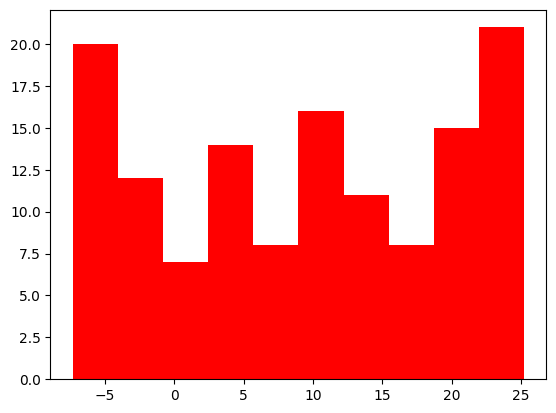

In [52]:
plt.hist(data=df, x='최저기온 평균(℃)',color='r')

plt.show()

In [37]:
sb.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [38]:
sb.color_palette()[6]

(0.8901960784313725, 0.4666666666666667, 0.7607843137254902)

In [39]:
base_color = sb.color_palette()[6]

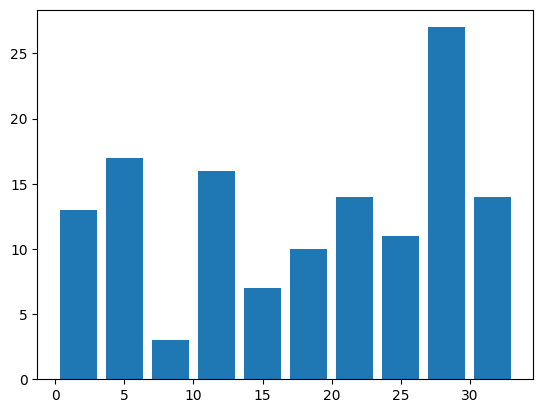

In [40]:
plt.hist(data=df,x='최고기온 평균(℃)', rwidth=0.8)

plt.show()

In [41]:
base_order =df['평균기온(℃)'].value_counts().index

In [42]:
df

,일시,평균기온(℃),최고기온 평균(℃),최저기온 평균(℃),강수량(mm)
0,2013-01,-3.4,0.3,-6.6,22.1
1,2013-02,-1.2,2.8,-4.9,74.1
2,2013-03,5.1,10.8,0.7,27.3
3,2013-04,10.0,15.0,5.7,71.7
4,2013-05,18.2,23.6,13.7,132.0
...,...,...,...,...,...
127,2023-08,27.2,30.8,24.3,298.1
128,2023-09,23.7,27.6,20.2,134.5
129,2023-10,15.8,21.0,11.5,31.0
130,2023-11,0.0,0.0,0.0,69.8


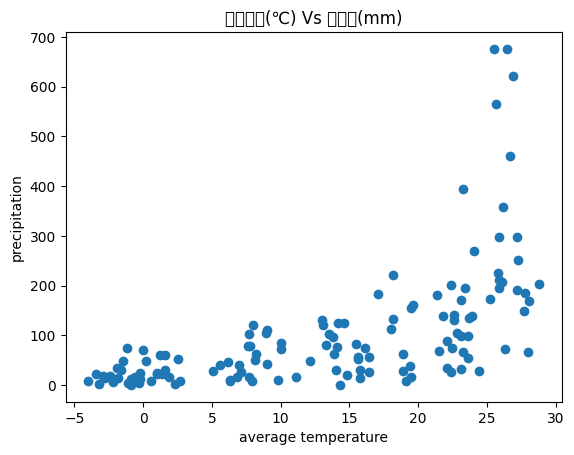

In [51]:
plt.scatter(data=df, x='평균기온(℃)', y='강수량(mm)')

plt.title('평균기온(℃) Vs 강수량(mm)')

plt.xlabel('average temperature')

plt.ylabel('precipitation')

plt.show()

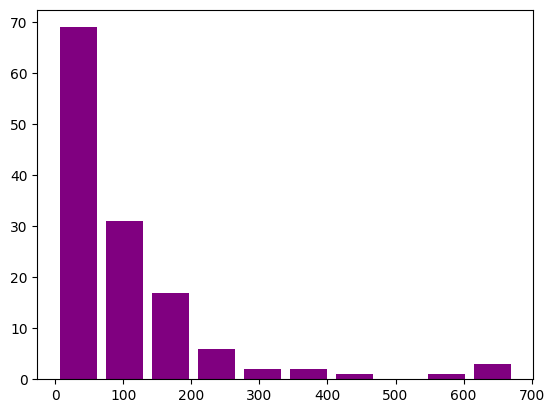

In [57]:
plt.hist(data=df,x='강수량(mm)', rwidth=0.8, color='purple')
plt.show()

In [45]:
df['강수량(mm)'].mean()

103.1969696969697

In [46]:
df_corr = df.corr(numeric_only=True)

In [47]:
df_corr

,평균기온(℃),최고기온 평균(℃),최저기온 평균(℃),강수량(mm)
평균기온(℃),1.000000,0.996349,0.997146,0.592762
최고기온 평균(℃),0.996349,1.000000,0.987366,0.551543
최저기온 평균(℃),0.997146,0.987366,1.000000,0.625464
강수량(mm),0.592762,0.551543,0.625464,1.000000


In [48]:
df[['평균기온(℃)','강수량(mm)']].corr()

,평균기온(℃),강수량(mm)
평균기온(℃),1.000000,0.592762
강수량(mm),0.592762,1.000000


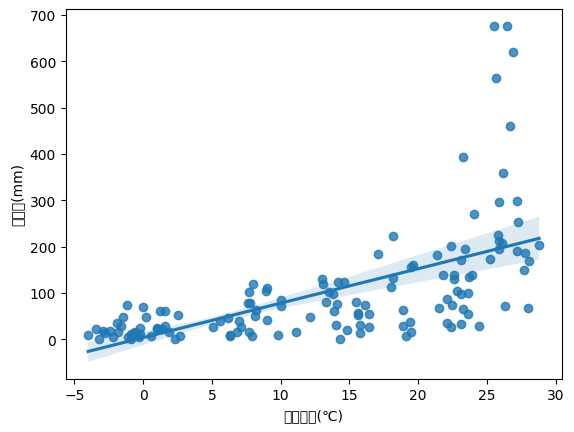

In [50]:
sb.regplot(data= df, x='평균기온(℃)',y='강수량(mm)')

plt.show()

In [58]:
df.loc[ df['강수량(mm)'] == df['강수량(mm)'].min(), ]

,일시,평균기온(℃),최고기온 평균(℃),최저기온 평균(℃),강수량(mm)
72,2019-01,-0.9,4.1,-5.1,0.0
93,2020-10,14.3,19.5,9.6,0.0


In [59]:
df.loc[ df['강수량(mm)'] == df['강수량(mm)'].max(), ]

,일시,평균기온(℃),최고기온 평균(℃),최저기온 평균(℃),강수량(mm)
6,2013-07,25.5,28.3,23.4,676.2


In [60]:
df

,일시,평균기온(℃),최고기온 평균(℃),최저기온 평균(℃),강수량(mm)
0,2013-01,-3.4,0.3,-6.6,22.1
1,2013-02,-1.2,2.8,-4.9,74.1
2,2013-03,5.1,10.8,0.7,27.3
3,2013-04,10.0,15.0,5.7,71.7
4,2013-05,18.2,23.6,13.7,132.0
...,...,...,...,...,...
127,2023-08,27.2,30.8,24.3,298.1
128,2023-09,23.7,27.6,20.2,134.5
129,2023-10,15.8,21.0,11.5,31.0
130,2023-11,0.0,0.0,0.0,69.8
